In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import MinMaxScaler

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/all-elon-musks-tweets")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/TweetsElonMusk.csv", encoding = "latin-1")
df.head()

100%|██████████| 1.44M/1.44M [00:00<00:00, 116MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/all-elon-musks-tweets/versions/7


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",NaN,NaN,NaN,NaN


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df["time"]

,time
0,18:50:33
1,18:48:58
2,17:49:38
3,15:23:49
4,09:18:47
...,...
12557,11:53:14
12558,10:50:45
12559,10:48:25
12560,03:41:45


In [5]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12562 non-null  int64  
 1   conversation_id  12562 non-null  int64  
 2   created_at       12562 non-null  object 
 3   date             12562 non-null  object 
 4   time             12562 non-null  object 
 5   timezone         12562 non-null  int64  
 6   user_id          12562 non-null  int64  
 7   username         12562 non-null  object 
 8   name             12562 non-null  object 
 9   place            0 non-null      float64
 10  tweet            12562 non-null  object 
 11  language         12562 non-null  object 
 12  mentions         12562 non-null  object 
 13  urls             12562 non-null  object 
 14  photos           12562 non-null  object 
 15  replies_count    12562 non-null  int64  
 16  retweets_count   12562 non-null  int64  
 17  likes_count 

In [7]:
df_finale_cleaned = df.drop(
    ["id", "user_id", "user_id", "created_at", "timezone", "username", "name", "place", "language", "mentions",
     "urls", "photos","cashtags", "link", "quote_url", "video", "thumbnail", "near", "geo", "source", "user_rt_id",
     "user_rt", "retweet_id", "retweet_date", "translate", "trans_src", "trans_dest"], axis=1)

In [8]:
df_finale_cleaned.head()

,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to
0,1381002894032347138,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,640,444,15281,[],False,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,1372444955050971142,2021-04-11,18:48:58,Love this beautiful shot,2464,1517,71161,[],False,[]
2,1381230136918433792,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,[],False,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb..."
3,1381221447322935303,2021-04-11,15:23:49,The art In Cyberpunk is incredible,8437,10329,228144,[],False,[]
4,1381079981485252611,2021-04-11,09:18:47,@itsALLrisky ð¤£ð¤£,446,542,7489,[],False,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð..."


## Pulizzia dataframe

In [9]:
df_finale_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  12562 non-null  int64 
 1   date             12562 non-null  object
 2   time             12562 non-null  object
 3   tweet            12562 non-null  object
 4   replies_count    12562 non-null  int64 
 5   retweets_count   12562 non-null  int64 
 6   likes_count      12562 non-null  int64 
 7   hashtags         12562 non-null  object
 8   retweet          12562 non-null  bool  
 9   reply_to         12562 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 895.7+ KB


In [10]:
df_finale_cleaned.dropna()
df_finale_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  12562 non-null  int64 
 1   date             12562 non-null  object
 2   time             12562 non-null  object
 3   tweet            12562 non-null  object
 4   replies_count    12562 non-null  int64 
 5   retweets_count   12562 non-null  int64 
 6   likes_count      12562 non-null  int64 
 7   hashtags         12562 non-null  object
 8   retweet          12562 non-null  bool  
 9   reply_to         12562 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 895.7+ KB


In [11]:
df_finale_cleaned.drop_duplicates()
df_finale_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  12562 non-null  int64 
 1   date             12562 non-null  object
 2   time             12562 non-null  object
 3   tweet            12562 non-null  object
 4   replies_count    12562 non-null  int64 
 5   retweets_count   12562 non-null  int64 
 6   likes_count      12562 non-null  int64 
 7   hashtags         12562 non-null  object
 8   retweet          12562 non-null  bool  
 9   reply_to         12562 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 895.7+ KB


# test

In [45]:
df_finale_cleaned.sort_values(by="likes_count", ascending=False)[["date","tweet","likes_count"]].head(10)

,date,tweet,likes_count
3694,2020-03-06,The coronavirus panic is dumb,1593425
7595,2018-10-20,Had to been done ur welcome https://t.co/7jT0...,1202081
528,2021-02-04,ur welcome https://t.co/e2KF57KLxb,1003772
716,2021-01-09,"My 14-year-old son, Saxon, said he feels like ...",931237
164,2021-03-24,You can now buy a Tesla with Bitcoin,902515
684,2021-01-13,Legalize comedy,899453
2495,2020-06-26,https://t.co/e9dPKVSjjl,852714
426,2021-02-15,https://t.co/w11m1IAG0z,841757
2722,2020-05-30,5 mins to T-0,837220
480,2021-02-08,ð¶ Who let the Doge out ð¶,791454


# Distribuzioni

In [15]:
df_finale_cleaned["hour"] = pd.to_datetime(df_finale_cleaned["time"]).dt.hour
df_finale_cleaned.head()

/tmp/ipython-input-15-3297820541.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_finale_cleaned["hour"] = pd.to_datetime(df_finale_cleaned["time"]).dt.hour


,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour
0,1381002894032347138,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,640,444,15281,[],False,"[{'screen_name': 'vincent13031925', 'name': 'V...",18
1,1372444955050971142,2021-04-11,18:48:58,Love this beautiful shot,2464,1517,71161,[],False,[],18
2,1381230136918433792,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,[],False,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",17
3,1381221447322935303,2021-04-11,15:23:49,The art In Cyberpunk is incredible,8437,10329,228144,[],False,[],15
4,1381079981485252611,2021-04-11,09:18:47,@itsALLrisky ð¤£ð¤£,446,542,7489,[],False,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",9


In [16]:
df_finale_cleaned["date"] = pd.to_datetime(df_finale_cleaned["date"])
df_finale_cleaned.head()

,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour
0,1381002894032347138,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,640,444,15281,[],False,"[{'screen_name': 'vincent13031925', 'name': 'V...",18
1,1372444955050971142,2021-04-11,18:48:58,Love this beautiful shot,2464,1517,71161,[],False,[],18
2,1381230136918433792,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,[],False,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",17
3,1381221447322935303,2021-04-11,15:23:49,The art In Cyberpunk is incredible,8437,10329,228144,[],False,[],15
4,1381079981485252611,2021-04-11,09:18:47,@itsALLrisky ð¤£ð¤£,446,542,7489,[],False,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",9


## box plot


<Axes: >

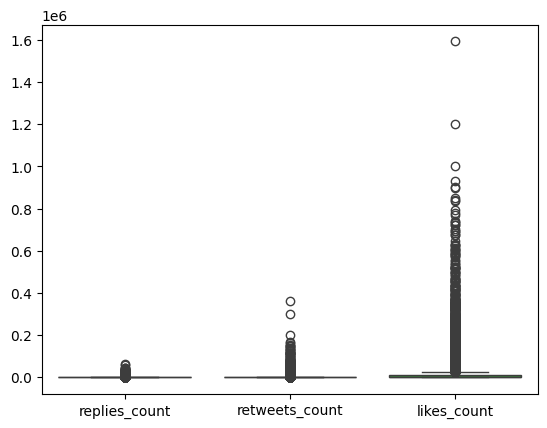

In [17]:
sns.boxplot(data = df_finale_cleaned[["replies_count", "retweets_count", "likes_count"]])

## correlazioni

In [18]:
df_finale_cleaned.head()


,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour
0,1381002894032347138,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,640,444,15281,[],False,"[{'screen_name': 'vincent13031925', 'name': 'V...",18
1,1372444955050971142,2021-04-11,18:48:58,Love this beautiful shot,2464,1517,71161,[],False,[],18
2,1381230136918433792,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,[],False,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",17
3,1381221447322935303,2021-04-11,15:23:49,The art In Cyberpunk is incredible,8437,10329,228144,[],False,[],15
4,1381079981485252611,2021-04-11,09:18:47,@itsALLrisky ð¤£ð¤£,446,542,7489,[],False,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",9


<Axes: >

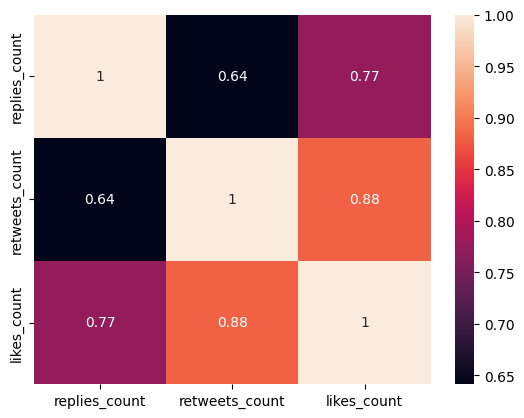

In [19]:
sns.heatmap(df_finale_cleaned[["replies_count", "retweets_count", "likes_count"]].corr(), annot=True)

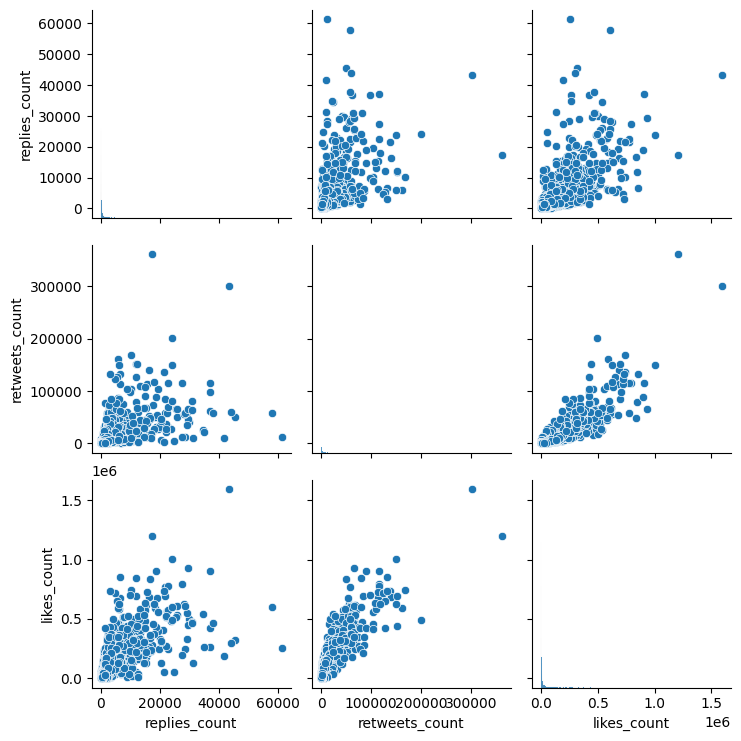

In [20]:
sns.pairplot(df_finale_cleaned[["replies_count", "retweets_count", "likes_count"]])

## divisone per ora

In [21]:
type(df_finale_cleaned["hour"][0])

numpy.int32

<Axes: xlabel='hour', ylabel='Count'>

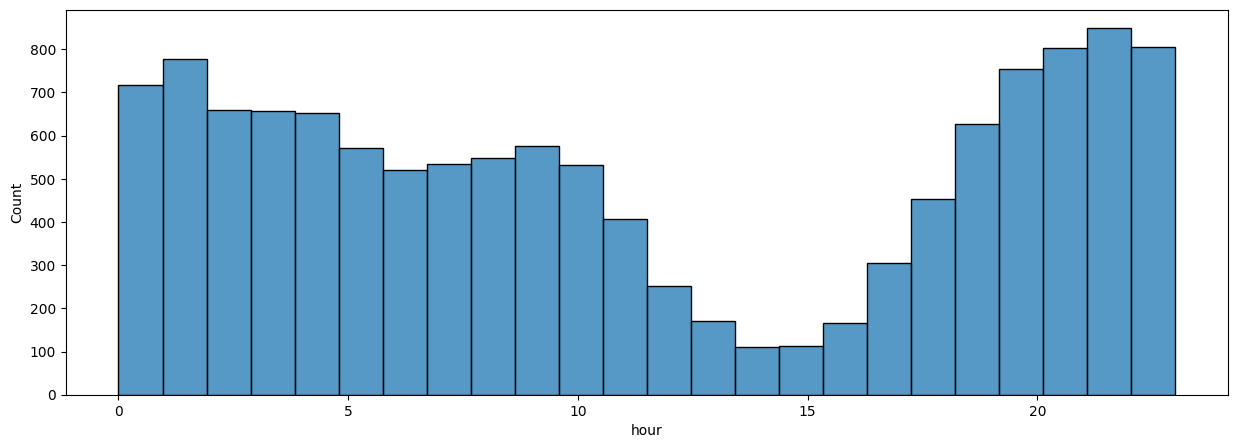

In [22]:
plt.figure(figsize=(15, 5))
sns.histplot(df_finale_cleaned["hour"], bins = 24)

In [23]:
df_finale_cleaned.head()

,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour
0,1381002894032347138,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,640,444,15281,[],False,"[{'screen_name': 'vincent13031925', 'name': 'V...",18
1,1372444955050971142,2021-04-11,18:48:58,Love this beautiful shot,2464,1517,71161,[],False,[],18
2,1381230136918433792,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,[],False,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",17
3,1381221447322935303,2021-04-11,15:23:49,The art In Cyberpunk is incredible,8437,10329,228144,[],False,[],15
4,1381079981485252611,2021-04-11,09:18:47,@itsALLrisky ð¤£ð¤£,446,542,7489,[],False,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",9


## divisione per mese

In [24]:
df_finale_cleaned["year_month"] = df_finale_cleaned["date"].dt.to_period('M').astype(str)
df_finale_cleaned.head()

,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour,year_month
0,1381002894032347138,2021-04-11,18:50:33,@vincent13031925 For now. Costs are decreasing...,640,444,15281,[],False,"[{'screen_name': 'vincent13031925', 'name': 'V...",18,2021-04
1,1372444955050971142,2021-04-11,18:48:58,Love this beautiful shot,2464,1517,71161,[],False,[],18,2021-04
2,1381230136918433792,2021-04-11,17:49:38,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,115,48,1380,[],False,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",17,2021-04
3,1381221447322935303,2021-04-11,15:23:49,The art In Cyberpunk is incredible,8437,10329,228144,[],False,[],15,2021-04
4,1381079981485252611,2021-04-11,09:18:47,@itsALLrisky ð¤£ð¤£,446,542,7489,[],False,"[{'screen_name': 'itsALLrisky', 'name': 'ð¸ð...",9,2021-04


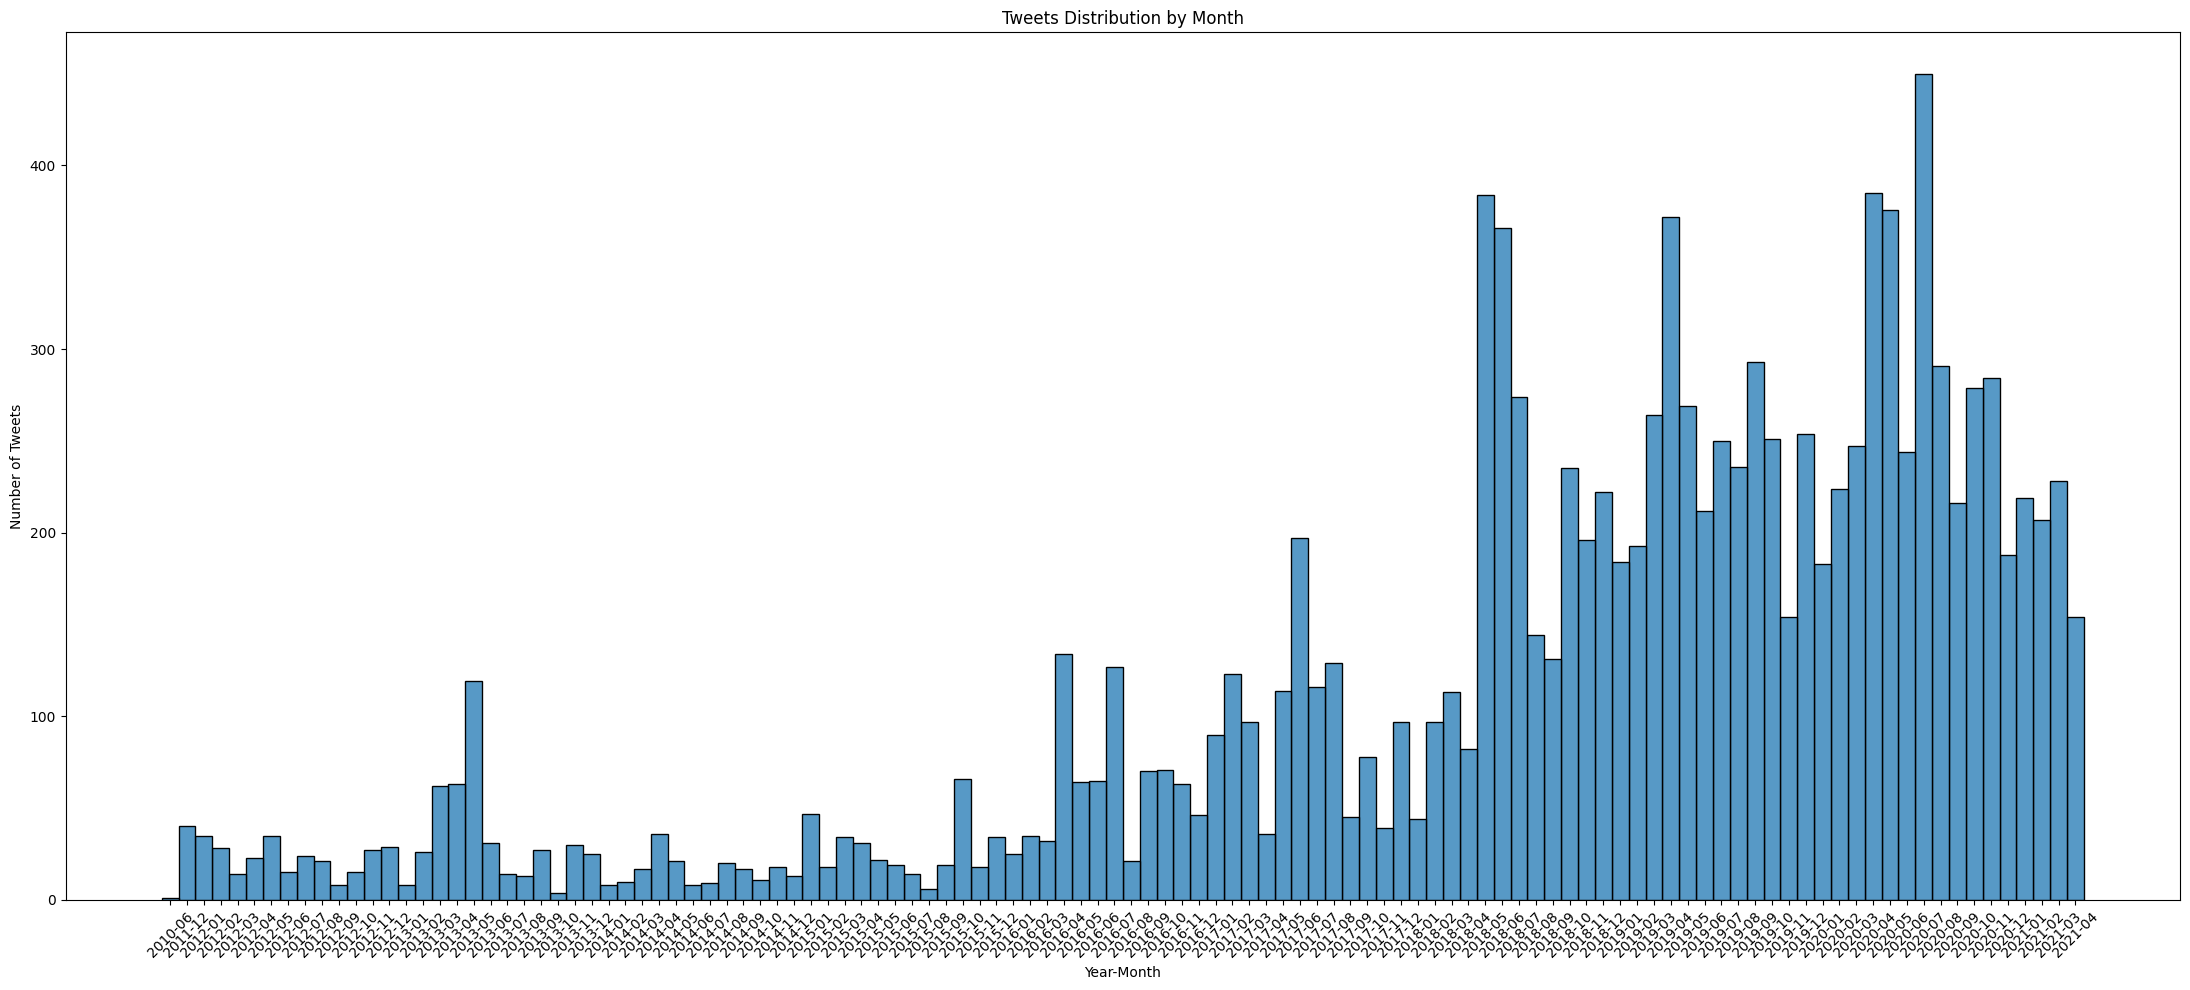

In [25]:
plt.figure(figsize=(22, 10))
sns.histplot(df_finale_cleaned["year_month"])
plt.gca().invert_xaxis()
plt.xticks(rotation=45)
plt.title('Tweets Distribution by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()


In [26]:
df_finale_cleaned.groupby(["year_month"])["tweet"].count().sort_values(ascending=False).head(10)

,tweet
year_month,
2020-07,450
2020-04,385
2018-05,384
2020-05,376
2019-04,372
2018-06,366
2019-09,293
2020-08,291
2020-11,284


In [27]:
df_finale_cleaned_ntweets = df_finale_cleaned.groupby(["year_month"])["tweet"].count().sort_values(ascending=False).reset_index()
df_finale_cleaned_ntweets.columns = ['year_month', 'tweet_count']
df_finale_cleaned_ntweets.head(10)

,year_month,tweet_count
0,2020-07,450
1,2020-04,385
2,2018-05,384
3,2020-05,376
4,2019-04,372
5,2018-06,366
6,2019-09,293
7,2020-08,291
8,2020-11,284
9,2020-10,279


<Axes: xlabel='date', ylabel='Count'>

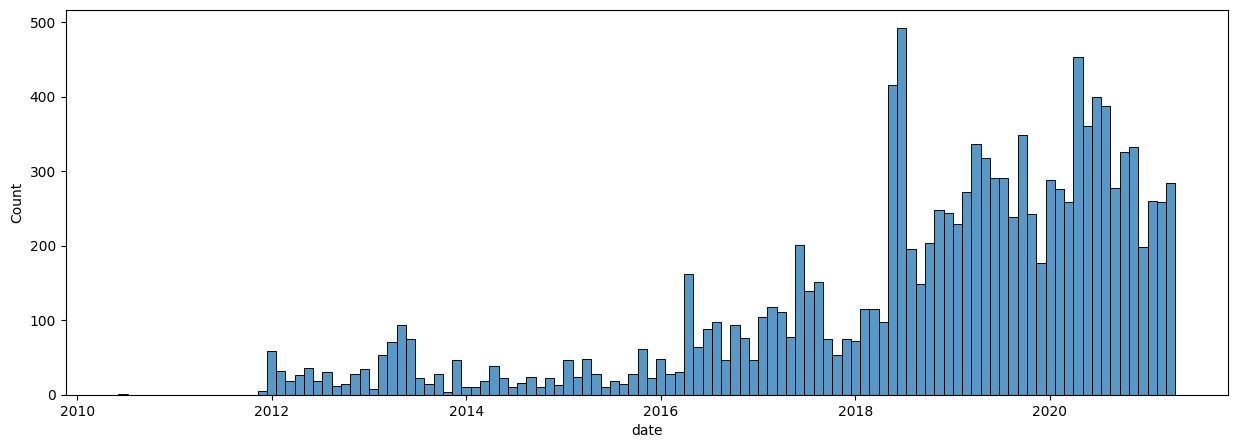

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(df_finale_cleaned["date"], bins= 114)

### likes per mese

In [29]:
df_finale_cleaned_sum_likes = df_finale_cleaned.groupby(["year_month"])["likes_count"].sum().sort_index()
df_finale_cleaned_sum_likes.sort_values(ascending=False).head(10)

,likes_count
year_month,
2021-02,22447522
2021-01,16696302
2021-03,16007731
2020-05,12913792
2020-07,12280997
2021-04,8859324
2020-06,8826147
2020-12,8761866
2019-12,7617494


<Axes: xlabel='year_month'>

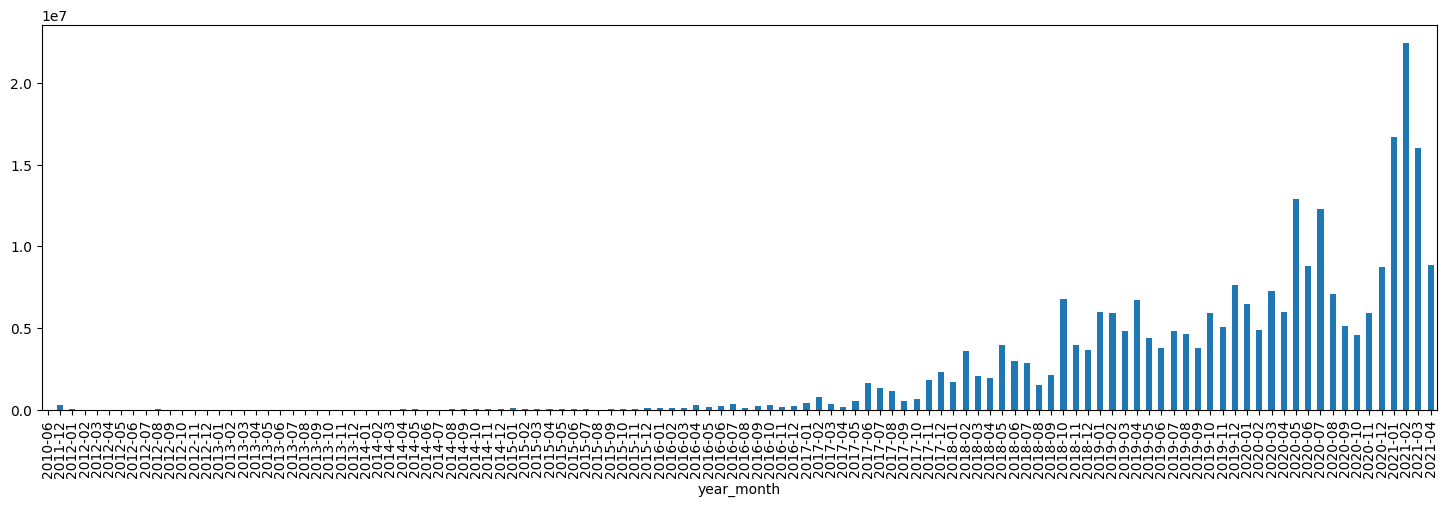

In [30]:
plt.figure(figsize=(18, 5))
df_finale_cleaned_sum_likes.plot(kind="bar")

### calcolo retweat per mese

In [31]:
df_finale_cleaned_sum_retweets = df_finale_cleaned.groupby(["year_month"])["retweets_count"].sum().sort_index()
df_finale_cleaned_sum_retweets.sort_values(ascending=False).head(10)

,retweets_count
year_month,
2021-02,2054947
2021-01,1381739
2020-05,1282088
2021-03,1200080
2018-10,1141431
2020-07,1006984
2020-03,890420
2020-06,875734
2019-12,788568


<Axes: xlabel='year_month'>

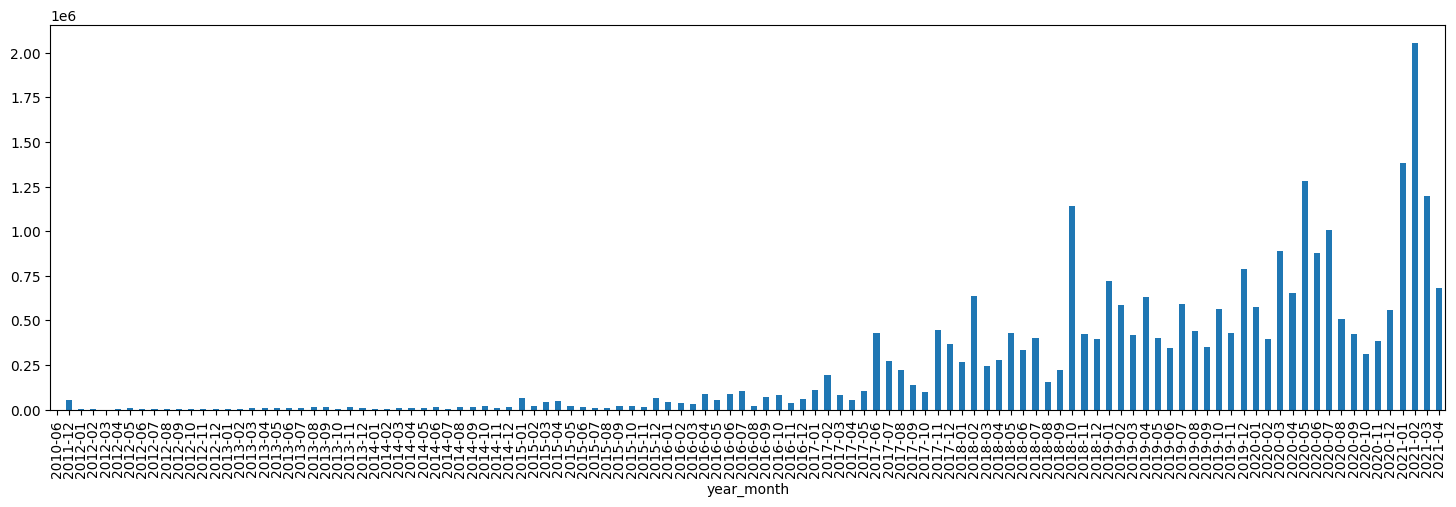

In [32]:
plt.figure(figsize=(18, 5))
df_finale_cleaned_sum_retweets.plot(kind="bar")

### Merge: nretweet/ntweet/nlikes per mese  



In [33]:
merged_df = df_finale_cleaned_ntweets.merge(df_finale_cleaned_sum_likes, on='year_month', how='outer')
final_merged_df = merged_df.merge(df_finale_cleaned_sum_retweets, on='year_month', how='outer')
final_merged_df.head(10)

,year_month,tweet_count,likes_count,retweets_count
0,2010-06,1,4710,349
1,2011-12,40,292316,56398
2,2012-01,35,26537,2668
3,2012-02,28,5167,2463
4,2012-03,14,909,792
5,2012-04,23,4309,2581
6,2012-05,35,2738,9566
7,2012-06,15,2902,2588
8,2012-07,24,1871,2848
9,2012-08,21,41975,5202


In [34]:
final_merged_df["likes_per_tweet"] = (final_merged_df["likes_count"] / final_merged_df["tweet_count"]).round().astype(int)
final_merged_df["retweets_per_tweet"] = (final_merged_df["retweets_count"] / final_merged_df["tweet_count"]).round().astype(int)
final_merged_df.head(10)


,year_month,tweet_count,likes_count,retweets_count,likes_per_tweet,retweets_per_tweet
0,2010-06,1,4710,349,4710,349
1,2011-12,40,292316,56398,7308,1410
2,2012-01,35,26537,2668,758,76
3,2012-02,28,5167,2463,185,88
4,2012-03,14,909,792,65,57
5,2012-04,23,4309,2581,187,112
6,2012-05,35,2738,9566,78,273
7,2012-06,15,2902,2588,193,173
8,2012-07,24,1871,2848,78,119
9,2012-08,21,41975,5202,1999,248


In [35]:
final_merged_df.sort_values(by="likes_per_tweet", ascending=False).head(10)

,year_month,tweet_count,likes_count,retweets_count,likes_per_tweet,retweets_per_tweet
111,2021-02,207,22447522,2054947,108442,9927
110,2021-01,219,16696302,1381739,76239,6309
112,2021-03,228,16007731,1200080,70209,5264
113,2021-04,154,8859324,683864,57528,4441
72,2017-11,39,1844860,444668,47304,11402
109,2020-12,188,8761866,560268,46606,2980
74,2018-01,44,1672880,267806,38020,6086
75,2018-02,97,3614126,639840,37259,6596
103,2020-06,244,8826147,875734,36173,3589
98,2020-01,183,6454519,574244,35271,3138


In [36]:
final_merged_df.sort_values(by="retweets_per_tweet", ascending=False).head(10)

,year_month,tweet_count,likes_count,retweets_count,likes_per_tweet,retweets_per_tweet
72,2017-11,39,1844860,444668,47304,11402
111,2021-02,207,22447522,2054947,108442,9927
75,2018-02,97,3614126,639840,37259,6596
110,2021-01,219,16696302,1381739,76239,6309
74,2018-01,44,1672880,267806,38020,6086
112,2021-03,228,16007731,1200080,70209,5264
83,2018-10,235,6791716,1141431,28901,4857
113,2021-04,154,8859324,683864,57528,4441
86,2019-01,184,5978297,720835,32491,3918
73,2017-12,97,2295762,366087,23668,3774


<Axes: xlabel='year_month'>

<Figure size 1800x500 with 0 Axes>

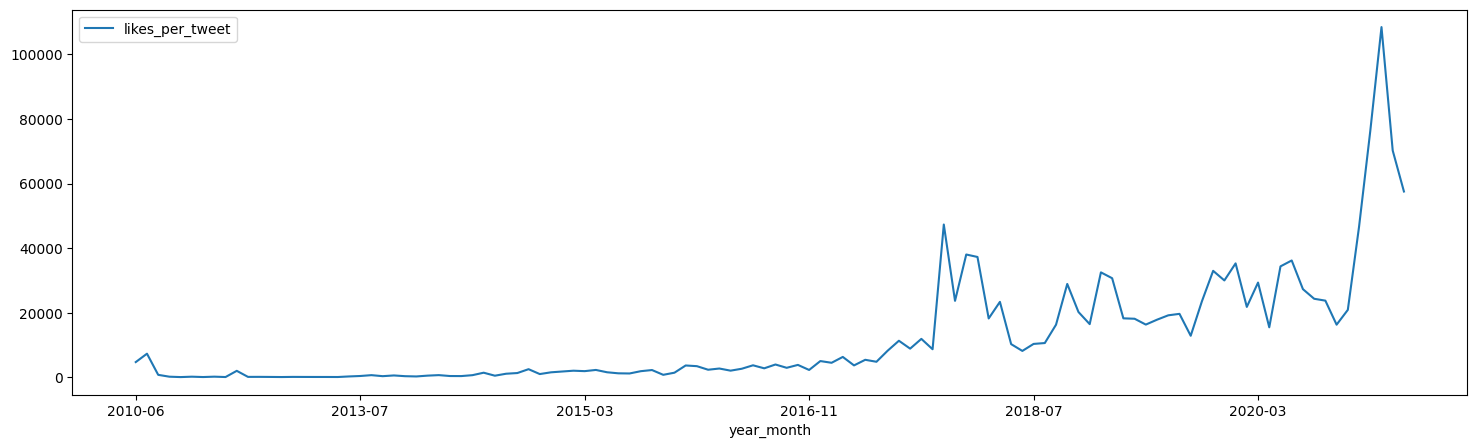

In [37]:
plt.figure(figsize=(18, 5))
final_merged_df.plot(x="year_month", y="likes_per_tweet", kind="line", figsize=(18, 5))

### normalize


In [38]:
#"likes_per_tweet",	"retweets_per_tweet"
#"likes_per_tweet_norm",	"retweets_per_tweet_norm"

final_merged_df[["tweet_count_norm",	"likes_count_norm", "retweets_count_norm", "likes_per_tweet_norm",	"retweets_per_tweet_norm"]] = MinMaxScaler().fit_transform(final_merged_df[["tweet_count",	"likes_count", "retweets_count", "likes_per_tweet",	"retweets_per_tweet"]])
final_merged_df.head(10)


,year_month,tweet_count,likes_count,retweets_count,likes_per_tweet,retweets_per_tweet,tweet_count_norm,likes_count_norm,retweets_count_norm,likes_per_tweet_norm,retweets_per_tweet_norm
0,2010-06,1,4710,349,4710,349,0.000000,0.000169,0.000000,0.042860,0.025738
1,2011-12,40,292316,56398,7308,1410,0.086860,0.012982,0.027280,0.066832,0.119260
2,2012-01,35,26537,2668,758,76,0.075724,0.001142,0.001129,0.006394,0.001675
3,2012-02,28,5167,2463,185,88,0.060134,0.000190,0.001029,0.001107,0.002732
4,2012-03,14,909,792,65,57,0.028953,0.000000,0.000216,0.000000,0.000000
5,2012-04,23,4309,2581,187,112,0.048998,0.000151,0.001086,0.001126,0.004848
6,2012-05,35,2738,9566,78,273,0.075724,0.000081,0.004486,0.000120,0.019039
7,2012-06,15,2902,2588,193,173,0.031180,0.000089,0.001090,0.001181,0.010225
8,2012-07,24,1871,2848,78,119,0.051225,0.000043,0.001216,0.000120,0.005465
9,2012-08,21,41975,5202,1999,248,0.044543,0.001829,0.002362,0.017845,0.016836


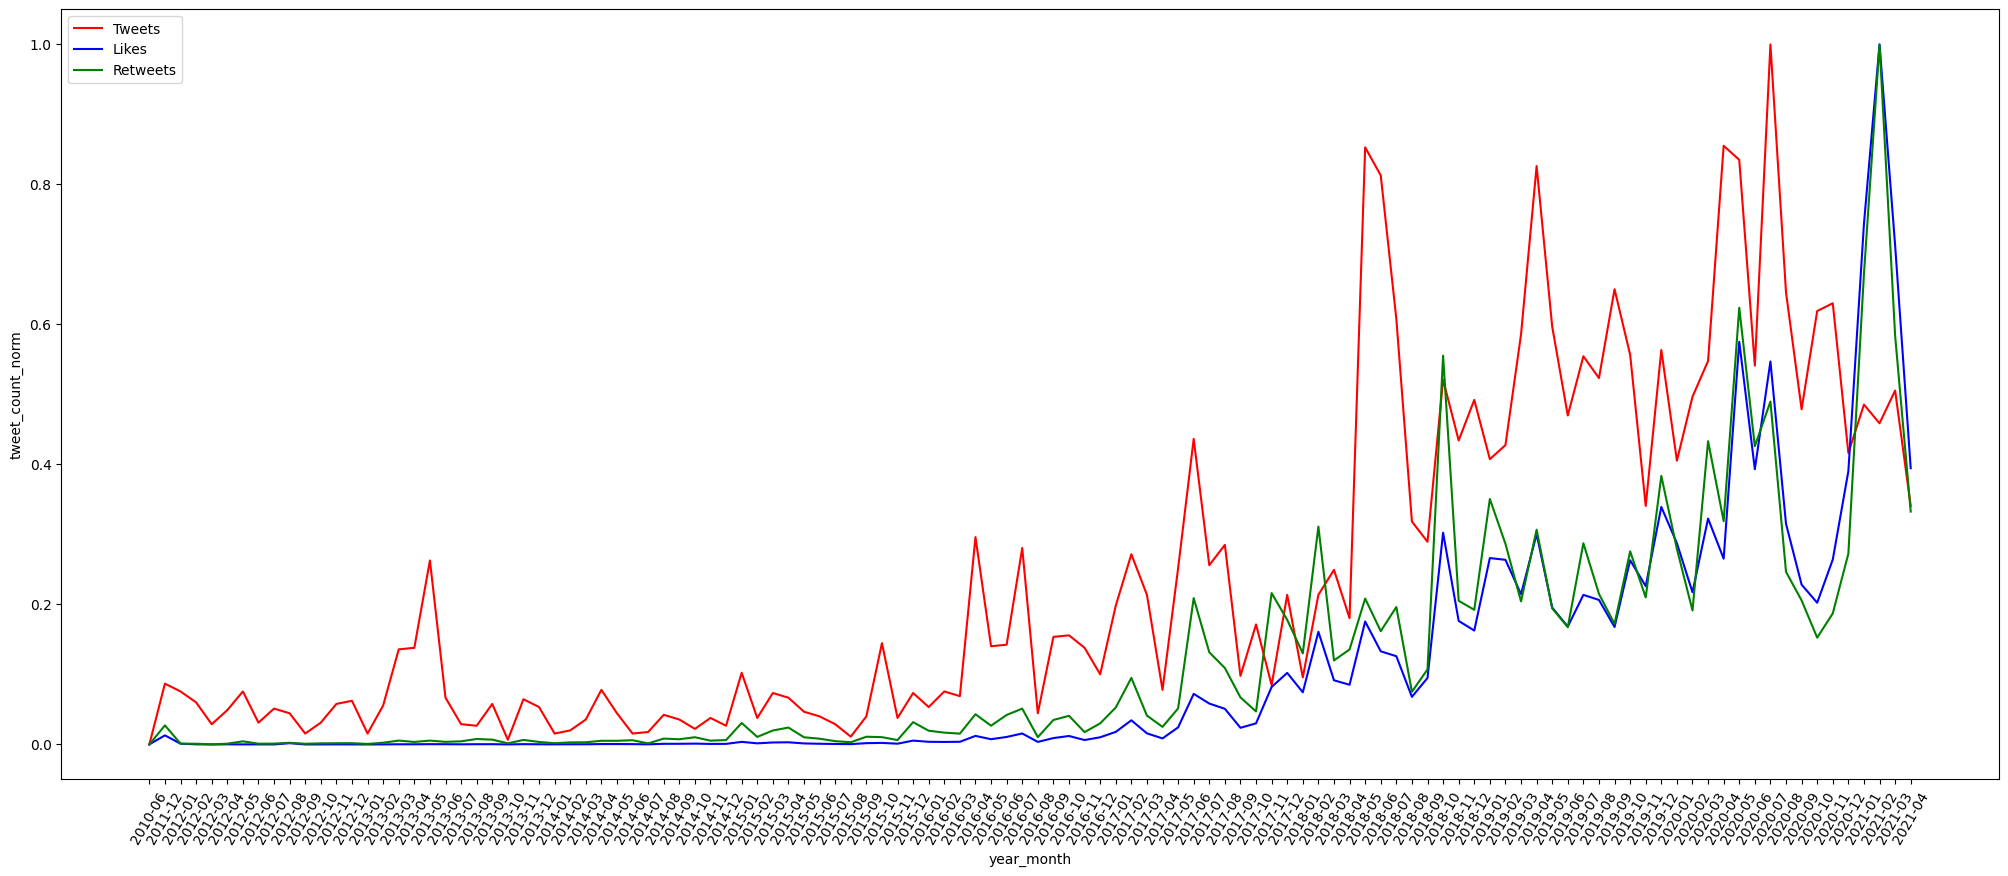

In [39]:
plt.figure(figsize=(25, 10))
sns.lineplot(data=final_merged_df, x='year_month', y='tweet_count_norm', color='red', label='Tweets')
sns.lineplot(data=final_merged_df, x='year_month', y='likes_count_norm', color='blue', label='Likes')
sns.lineplot(data=final_merged_df, x='year_month', y='retweets_count_norm', color='green', label='Retweets')
plt.xticks(rotation=60)
plt.show()

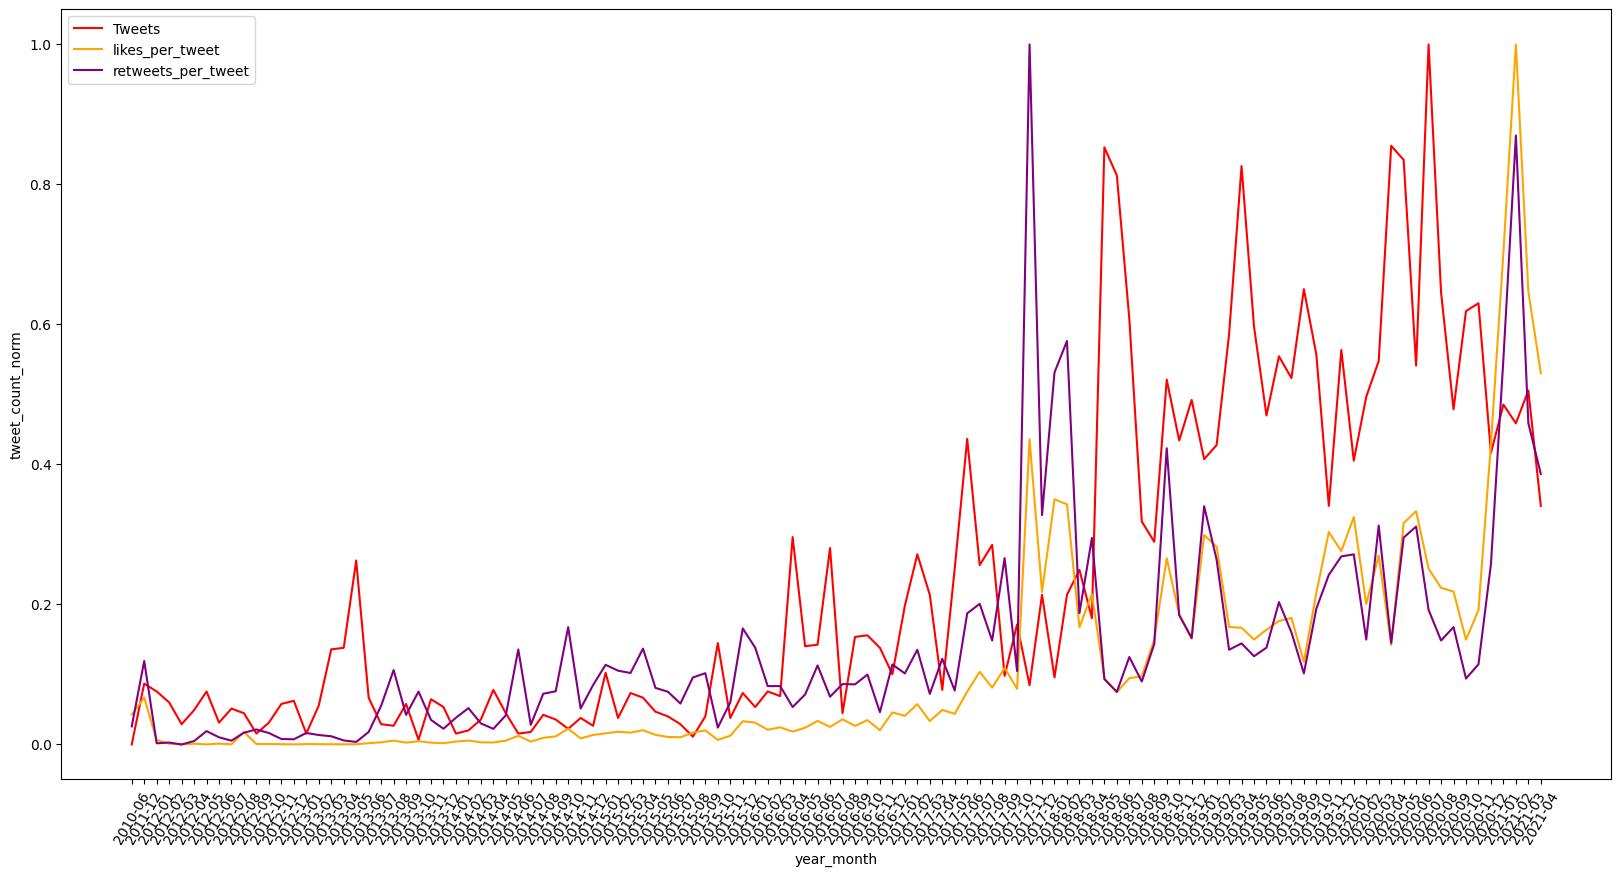

In [40]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=final_merged_df, x='year_month', y='tweet_count_norm', color='red', label='Tweets')
sns.lineplot(data=final_merged_df, x='year_month', y="likes_per_tweet_norm", color='orange', label='likes_per_tweet')
sns.lineplot(data=final_merged_df, x='year_month', y="retweets_per_tweet_norm", color='purple', label='retweets_per_tweet')
plt.xticks(rotation=60)
plt.show()

## division per anno

In [41]:
df_finale_cleaned.nlargest(10, 'date')


,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour,year_month
12515,1383295895043600384,2021-04-17,08:46:56,Dragon spacecraft &amp; Falcon 9 rocket https...,3352,5355,64372,[],False,[],8,2021-04
12516,1383280704042127363,2021-04-17,07:51:09,@WhatsupFranks Great progress by Tesla team,167,167,3480,[],False,"[{'screen_name': 'WhatsupFranks', 'name': 'fra...",7,2021-04
12517,1383280704042127363,2021-04-17,07:46:34,"If we make life multiplanetary, there may come...",7736,8411,87303,[],False,[],7,2021-04
12518,1383186564772077571,2021-04-17,07:16:45,@neuralink @shivon Great review! Neuralink is ...,351,628,6155,[],False,"[{'screen_name': 'neuralink', 'name': 'Neurali...",7,2021-04
12519,1383233200885882885,2021-04-17,04:37:48,Everything to the moon!,20322,42839,300427,[],False,[],4,2021-04
12520,1383177151541743621,2021-04-17,01:16:48,We are honored to be part of the @NASAArtemis ...,1717,2509,51682,[],False,[],1,2021-04
12521,1383177151541743621,2021-04-17,00:55:05,ðð¤ð« NASA Rules!! ð«ð¤ð,6062,13350,135461,[],False,[],0,2021-04
12522,1284291528328790016,2021-04-16,20:01:25,ð,11808,23959,222407,[],False,[],20,2021-04
12523,1382879908645392384,2021-04-16,05:13:57,ð¸ð¸ Austin Rocks!! ð¸ ð¸,10171,9276,154065,[],False,[],5,2021-04
12524,1382871347341168644,2021-04-16,05:00:14,@Model3Owners Same with Berlin,219,176,3722,[],False,"[{'screen_name': 'Model3Owners', 'name': 'Tesl...",5,2021-04


<Axes: xlabel='date', ylabel='Count'>

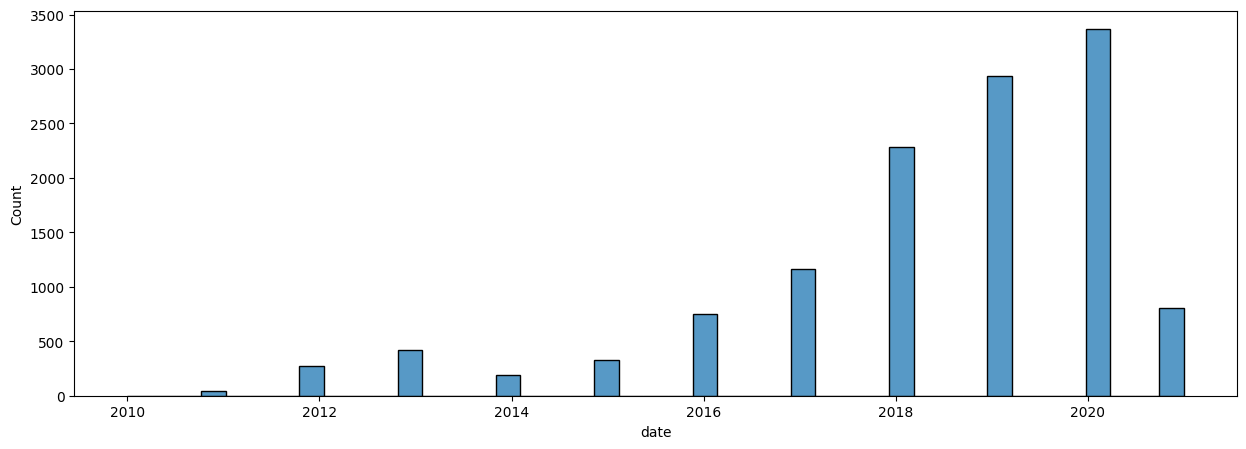

In [42]:
plt.figure(figsize=(15, 5))
sns.histplot(df_finale_cleaned["date"].dt.year)

In [43]:
df_finale_cleaned.groupby(df_finale_cleaned["date"].dt.year)["tweet"].count().sort_values(ascending=False)

,tweet
date,
2020,3367
2019,2932
2018,2288
2017,1161
2021,808
2016,753
2013,422
2015,328
2012,274


In [44]:
df_finale_cleaned.sort_values(by="date", ascending=False).head(10)

,conversation_id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,retweet,reply_to,hour,year_month
12515,1383295895043600384,2021-04-17,08:46:56,Dragon spacecraft &amp; Falcon 9 rocket https...,3352,5355,64372,[],False,[],8,2021-04
12516,1383280704042127363,2021-04-17,07:51:09,@WhatsupFranks Great progress by Tesla team,167,167,3480,[],False,"[{'screen_name': 'WhatsupFranks', 'name': 'fra...",7,2021-04
12517,1383280704042127363,2021-04-17,07:46:34,"If we make life multiplanetary, there may come...",7736,8411,87303,[],False,[],7,2021-04
12518,1383186564772077571,2021-04-17,07:16:45,@neuralink @shivon Great review! Neuralink is ...,351,628,6155,[],False,"[{'screen_name': 'neuralink', 'name': 'Neurali...",7,2021-04
12519,1383233200885882885,2021-04-17,04:37:48,Everything to the moon!,20322,42839,300427,[],False,[],4,2021-04
12520,1383177151541743621,2021-04-17,01:16:48,We are honored to be part of the @NASAArtemis ...,1717,2509,51682,[],False,[],1,2021-04
12521,1383177151541743621,2021-04-17,00:55:05,ðð¤ð« NASA Rules!! ð«ð¤ð,6062,13350,135461,[],False,[],0,2021-04
12526,1382871347341168644,2021-04-16,04:52:42,"@Model3Owners I was just there, driving Cybert...",771,802,16963,[],False,"[{'screen_name': 'Model3Owners', 'name': 'Tesl...",4,2021-04
12530,1382369145820303366,2021-04-16,00:10:47,@sadiaslayy @DogecoinBets ð®,1297,3611,40139,[],False,"[{'screen_name': 'sadiaslayy', 'name': 'Sadia'...",0,2021-04
12529,1382748455341322242,2021-04-16,02:33:34,@thesheetztweetz This is accurate. Service upt...,413,365,8076,[],False,"[{'screen_name': 'thesheetztweetz', 'name': 'M...",2,2021-04
